In [7]:
 ## Introductionto packages
    ## This how to install packages

using LinearAlgebra, Statistics, Plots, LaTeXStrings

In [8]:
## Code to draw a random number from a standard normal distribution
   ## I've added the "@show" command to demonstrate how to see all of the outputs not just the last line
@show randn()
@show randn()

randn() = -0.36109282196380105
randn() = 0.05994876125085614


0.05994876125085614

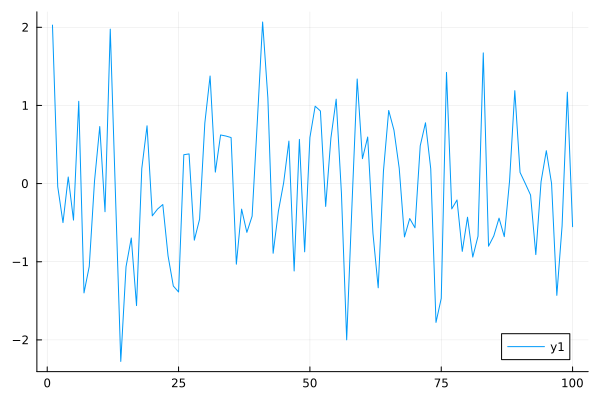

In [14]:
## How to use functionms from multiple packages
   ## 
n = 100
ep = randn(n)
plot(1:n, ep)

In [22]:
## Array

## To know what something is

@show typeof(ep)

## To get the first 5 elements of an array

@show ep[1:5]

typeof(ep) = Vector{Float64}
ep[1:5] = [2.0281802298415315, -0.038921064491196526, -0.4993808018392443, 0.08442779245153977, -0.4673492678448155]


5-element Vector{Float64}:
  2.0281802298415315
 -0.038921064491196526
 -0.4993808018392443
  0.08442779245153977
 -0.4673492678448155

In [26]:
## Below shows how to get help on a command

In [27]:
?typeof

search: typeof typejoin TypeError



```
typeof(x)
```

Get the concrete type of `x`.

See also [`eltype`](@ref).

# Examples

```jldoctest
julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Matrix{Float64} (alias for Array{Float64, 2})
```


In [37]:
## For loops

## Option 1 (poor style)
   ## How to convert an array of zeros to random draws from a standard normal distribution
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

ϵ[1:5]

## Option 2 (better style)
   ##
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

ϵ[1:5]

5-element Vector{Float64}:
  1.1208615610822759
  0.2478291781115596
  0.03385498383777676
  0.6085592442349659
 -0.6834474129778662

In [52]:
## Loop for summing the first 5 ϵ values (from earlier) and taking the mean 
   ##
ϵ_sum = 0.0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
@show ϵ_mean = ϵ_sum / m

## Using built in function to calculate the mean
@show mean(ϵ[1:m])

ϵ_mean = ϵ_sum / m = 0.2655315108577424
mean(ϵ[1:m]) = 0.2655315108577424


0.2655315108577424

In [79]:
## User defined function
   ## Example how to generate random variables

## Option 1 (poor style)
   ##
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # Square the result
    end
    return ϵ
end

generatedata(100000)
plot(ϵ)


## Option 2 (better style)
   ##
function generatedata(n)
    ϵ = randn(n)
    
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
    end
    return ϵ
end
data = generatedata(5)

5-element Vector{Float64}:
 0.1415817615737991
 0.1526995682197074
 1.4432503216064112
 0.024656069415829877
 0.24078177797260059